In [3]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [7]:
#load the dataset
bstn_data = load_boston()
bstn_data.keys()
print(bstn_data.feature_names)
print(bstn_data.target[0:10])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [8]:
df = pd.DataFrame(bstn_data.data)
# Create columns in df
df.columns = bstn_data.feature_names
# Create a target column with the dataset target
df['target'] = bstn_data.target

In [11]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# check the data (exploratory analysis)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

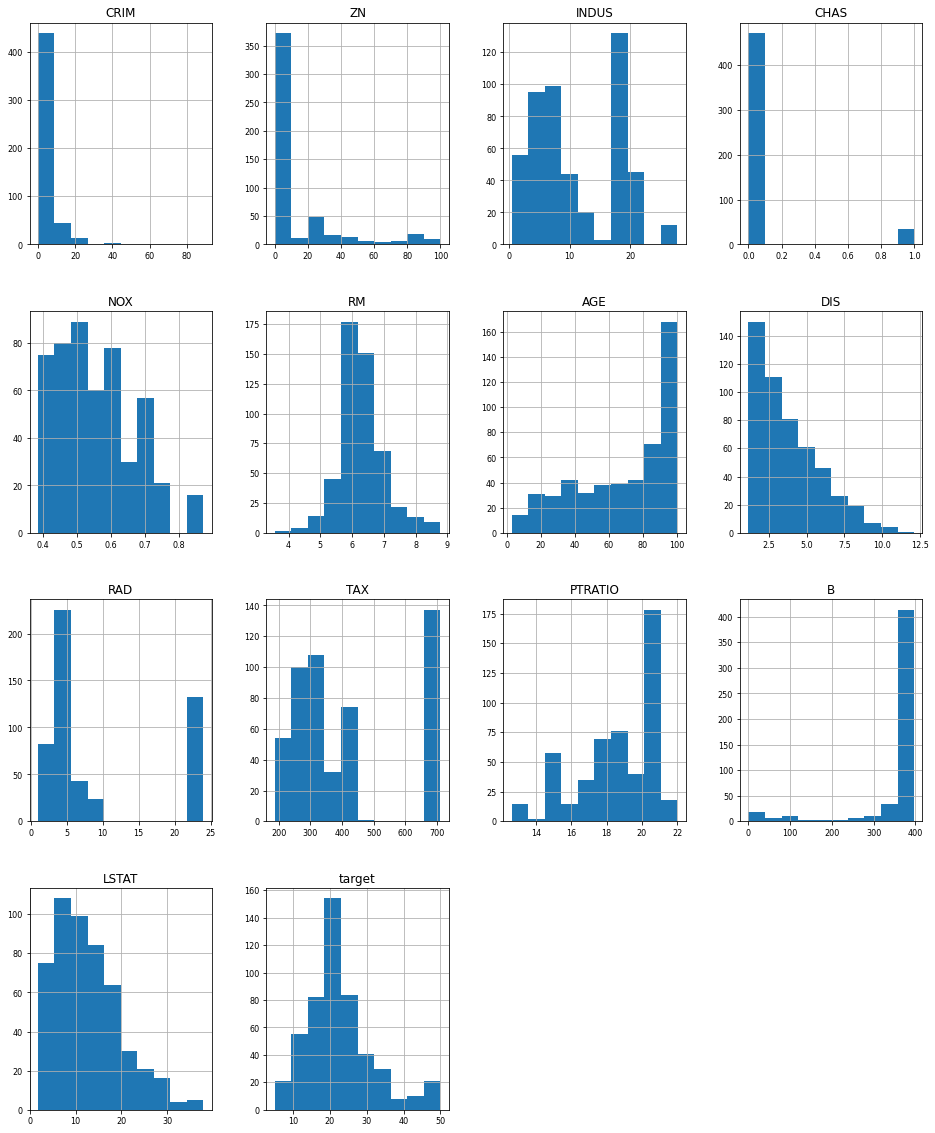

In [29]:
df.hist(figsize=(16,20), xlabelsize=8, ylabelsize=8)

In [ ]:
#investigate data.

# sns.FacetGrid(df, col='target', row='CRIM')
# plt.show()

In [3]:
### select the most important features. Some questions you can ask yourself:
#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

<AxesSubplot:>

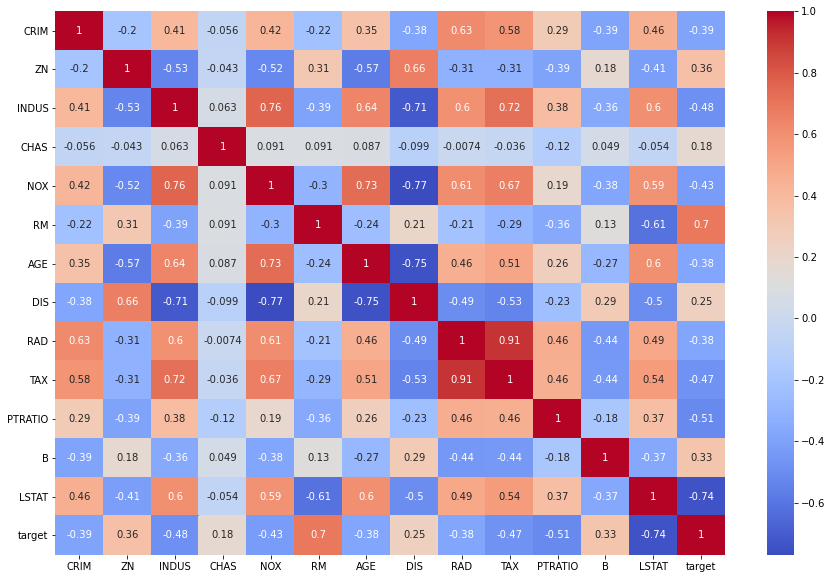

In [32]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(method="pearson"), annot = True, cmap='coolwarm')

In [34]:
# the variables that correlate with the target variable MEDV.
corr_matrix = df.corr()
features_rel = corr_matrix['target']
print(features_rel)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64


In [39]:
# features that are strongly correlated with target
cor_features = features_rel[abs(features_rel) > 0.6]
print(cor_features)

RM        0.695360
LSTAT    -0.737663
target    1.000000
Name: target, dtype: float64


#### `LSTAT` and `RM` are dependent on `target`
#### plotting the relationship of both features with `target`

Text(0.5, 1.0, 'Relation b/t LSTAT and target')

<Figure size 720x720 with 0 Axes>

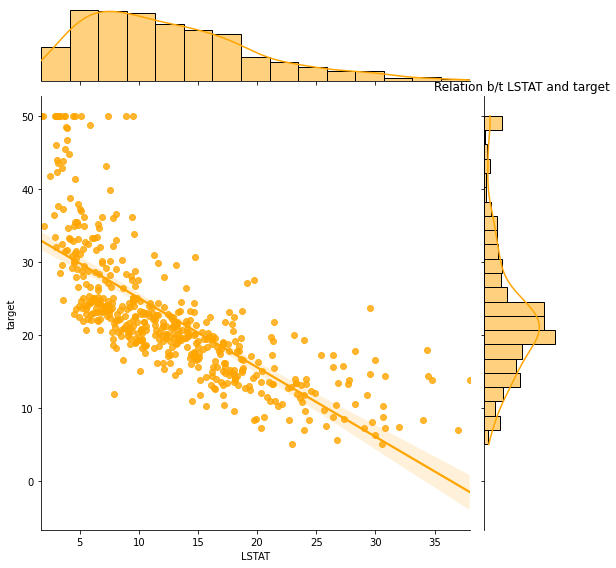

In [42]:
# LSTAT and target
plt.figure (figsize=(10,10))
sns.jointplot(x = 'LSTAT', y = 'target', data = df, kind = 'reg', height = 8, color = 'orange')
plt.title("Relation b/t LSTAT and target")

Text(0.5, 1.0, 'RM and target')

<Figure size 720x720 with 0 Axes>

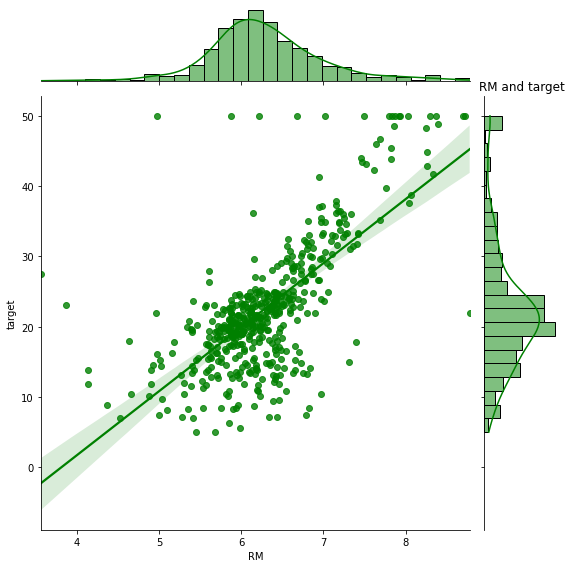

In [46]:
# RM and target
plt.figure (figsize=(10,10))
sns.jointplot(x = 'RM', y = 'target', data = df, kind = 'reg', color = 'green', height = 8)
plt.title("RM and target")

In [80]:
## split data into train and test
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=1)

### Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lr_model = lin_reg.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Accuracy Score
from sklearn import metrics
lm_r2_score_train = lr_model.score(X_train, y_train)
print(f"R-square score(R^2) on TRAIN data: {lm_r2_score_train}")

lm_r2_score_test = lr_model.score(X_test, y_test) # or metrics.r2_score(y_test, y_pred)
print(f"R-square score(R^2) on TEST data: {lm_r2_score_test}")

# adjusted r-square function
def adj_r2(x,y):
    r2 = lr_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

lm_adr2_score_train = adj_r2(X_train,y_train)
print(f"Adjusted R-square(R^2) score on TRAIN data: {lm_adr2_score_train}")

lm_adr2_score_test = adj_r2(X_test,y_test)
print(f"Adjusted R-square(R^2) score on TEST data: {lm_adr2_score_test}")

rmse_lr = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"RMSE for LinearRegression: {rmse_lr}")

R-square score(R^2) on TRAIN data: 0.7168057552393374
R-square score(R^2) on TEST data: 0.7789410172622855
Adjusted R-square(R^2) score on TRAIN data: 0.7067193848779987
Adjusted R-square(R^2) score on TEST data: 0.7535094528765307
RMSE for LinearRegression: 4.679504823808768


### Check if model is overfitting

In [87]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross valid
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

# best alpha parameter
alpha = lasscv.alpha_
print(f"Alpha value: {alpha} ")

#now that we have best parameter, let's use Lasso regression
lasso_reg = Lasso(alpha)
lasso_model = lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


r2_lasso_tr = lasso_model.score(X_train, y_train)
print(f"R-square(R^2) score on TRAIN data using LASSO Regression: {r2_lasso_tr}")

r2_lasso = lasso_model.score(X_test, y_test)
print(f"R-square(R^2) score on TEST data using LASSO Regression: {r2_lasso}")

rmse_lasso = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"RMSE for LASSO Regression: {rmse_lasso}")


Alpha value: 0.0018057697823535828 
R-square(R^2) score on TRAIN data using LASSO Regression: 0.7167908295198879
R-square(R^2) score on TEST data using LASSO Regression: 0.7793468069221045
RMSE for LASSO Regression: 4.679504823808768


#### *R-square is almost same as before using regularization. So it's fair to say that our model did not overfit the data.*

### Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Accuracy Score
from sklearn import metrics
RF_r2_score_train = rf_model.score(X_train, y_train)
print(f"R-square score(R^2) on TRAIN data: {RF_r2_score_train}")

RF_r2_score_test = rf_model.score(X_test, y_test) # or metrics.r2_score(y_test, y_pred)
print(f"R-square score(R^2) on TEST data: {RF_r2_score_test}")

# adjusted r-square function
def adj_r2(x,y):
    r2 = rf_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

RF_adr2_score_train = adj_r2(X_train,y_train)
print(f"Adjusted R-square(R^2) score on TRAIN data: {RF_adr2_score_train}")

RF_adr2_score_test = adj_r2(X_test,y_test)
print(f"Adjusted R-square(R^2) score on TEST data: {RF_adr2_score_test}")

rmse_RF = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"RMSE for RF Regression: {rmse_RF}")

R-square score(R^2) on TRAIN data: 0.9812623101550426
R-square score(R^2) on TEST data: 0.912388298887288
Adjusted R-square(R^2) score on TRAIN data: 0.9805949403797427
Adjusted R-square(R^2) score on TEST data: 0.9023090766353831
RMSE for RF Regression: 4.679504823808768


In [90]:
models = [('Linear Regression', rmse_lr, lm_r2_score_train, lm_r2_score_test),
          ('LASSO Regression', rmse_lasso, r2_lasso_tr, r2_lasso),
          ('RandomForest Regression', rmse_RF, RF_adr2_score_train, RF_adr2_score_test)]

results_df = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
results_df

,Model,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,4.679505,0.716806,0.778941
1,LASSO Regression,4.679505,0.716791,0.779347
2,RandomForest Regression,4.679505,0.980595,0.902309


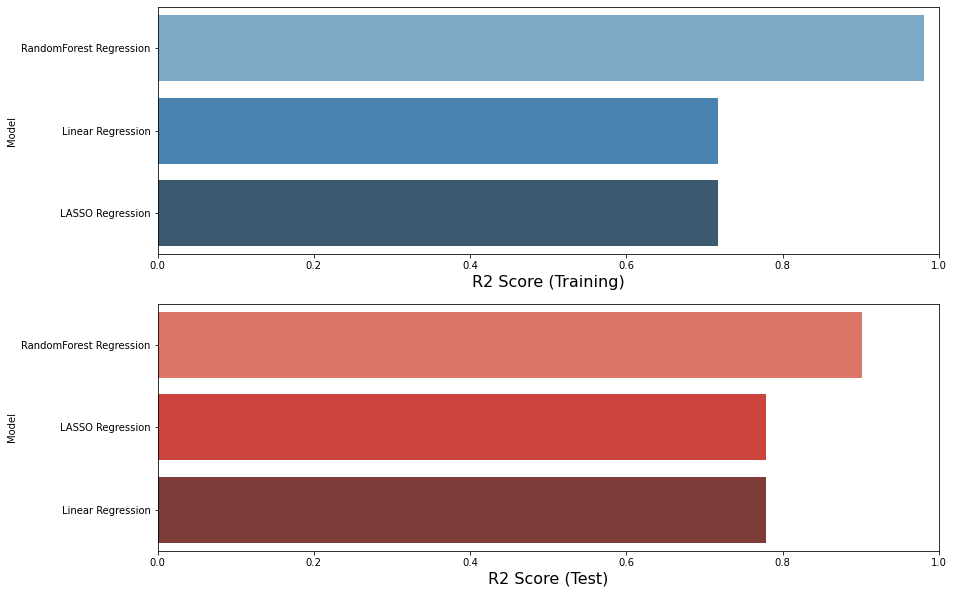

In [92]:
f, axes = plt.subplots(2,1, figsize=(14,10))

# TRAIN
results_df.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = results_df, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)


# TEST
results_df.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = results_df, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

In [94]:
# results_df.sort_values(by=['RMSE'], ascending=False, inplace=True)

# f, axe = plt.subplots(1,1, figsize=(18,6))
# sns.barplot(x='Model', y='RMSE', data=results_df, ax = axe)
# axe.set_xlabel('Model', size=16)
# axe.set_ylabel('RMSE', size=16)

# plt.show()